Wissenschaftliche Simulation
Projekt 1: Lineare Ausgleichsprobleme



Wir möchten lineare Ausgleichsprobleme der Form min ∥b − Ax∥ A ∈ R ^m×n, b ∈ R^m, m ≥ n lösen.


Aufgabe 2:

Zunächst versuchen wir, das Ausgleichsproblem über die Gaußschen Normalengleichungen zu lösen.

i) Schreiben Sie ein Programm, welches für eine gegebene symmetrische, positiv definite Matrix A ihre Cholesky-Zerlegung A = LL^⊤ bestimmt. 
Überprüfen Sie jeweils, ob die Eingabematrix A die Voraussetzungen erfüllt.

In [1]:

'''
Das Programm überprüft zuerst, ob die gegebene Matrix A symmetrisch ist, 
indem die Funktion is_symmetric verwendet wird. 
Wenn die Matrix nicht symmetrisch ist, wird eine entsprechende Fehlermeldung ausgegeben und das Programm beendet. 
Anschließend wird überprüft, ob die Matrix A positiv definit ist, indem die Funktion is_positive_definite verwendet wird.
Wenn die Matrix nicht positiv definit ist, wird eine Fehlermeldung ausgegeben und das Programm beendet. 
Wenn beide Voraussetzungen erfüllt sind, wird die Cholesky-Zerlegung von A mit der Funktion cholesky_decomposition berechnet und ausgegeben.

'''

import numpy as np
import math
from numpy.linalg import qr

# Funktion zur Überprüfung der Symmetrie einer Matrix
def is_symmetric(matrix):
    return np.allclose(matrix, matrix.T)

# Funktion zur Überprüfung der positiven Definitheit einer Matrix
def is_positive_definite(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    return np.all(eigenvalues > 0)

# Funktion zur Berechnung der Cholesky-Zerlegung
def cholesky_zerlegung(matrix):
    return np.linalg.cholesky(matrix)

# Beispielmatrixen
A = np.array ([[4, 2, 1],
              [2, 5, 3],
              [1, 3, 6]], dtype='float64')

B= np.array ([[1, 2, 1],
              [2, 5, 2],
              [1, 2, 10]])

C=np.array ([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

D=np.array ([[1, -3, 1, 0],
              [-3, 13, 3, 4],
              [1, 3, 14, 4],
              [0, 4, 4, 14]])

# in E ist eine Cholesky-Zerlegung nicht möglicht weil , es nicht positiv definiert und nicht symetriche ist
E=np.array ([[1, 0, 0, 0],
              [-3, 0, 3, 0],
              [1, 3, 3, 0],
              [0, 2, -1, 3]])



# Überprüfung der Voraussetzungen von A
if not is_symmetric(A):
    print("Die Matrix A ist nicht symmetrisch.")
    exit()
elif not is_positive_definite(A):
    print("Die Matrix A ist nicht positiv definit.")
    exit()

# Berechnung der Cholesky-Zerlegung von A
L_eins = cholesky_zerlegung(A)

print("Cholesky-Zerlegung von A:")
print(L_eins)


Cholesky-Zerlegung von A:
[[2.         0.         0.        ]
 [1.         2.         0.        ]
 [0.5        1.25       2.04633819]]


In [2]:
def cholesky_decomposition(A):
    n = A.shape[0]
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i+1):
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - np.sum(L[i, :j]**2))
            else:
                L[i, j] = (A[i, j] - np.dot(L[i, :j], L[j, :j])) / L[j, j]

    return L


# Überprüfen der Voraussetzungen für die Cholesky-Zerlegung
if np.all(np.linalg.eigvals(A) > 0) and np.allclose(A, A.T):
    # Berechnung der Cholesky-Zerlegung von A
    
    
    L = cholesky_decomposition(A)
    
    print("Cholesky-Zerlegung erfolgreich:")
    print(" --------------------------> ")
    print("L:")
    print(" --------------------------> ")
    print(L)
    print(" --------------------------> ")
    print("L^T:")
    print(" --------------------------> ")
    print(L.T)
else:
    print("Die Eingabematrix erfüllt nicht die Voraussetzungen für die Cholesky-Zerlegung.")

Cholesky-Zerlegung erfolgreich:
 --------------------------> 
L:
 --------------------------> 
[[2.         0.         0.        ]
 [1.         2.         0.        ]
 [0.5        1.25       2.04633819]]
 --------------------------> 
L^T:
 --------------------------> 
[[2.         1.         0.5       ]
 [0.         2.         1.25      ]
 [0.         0.         2.04633819]]


ii)Schreiben Sie ein Programm, welches das lineare Ausgleichsproblem durch Lösen der
Gaußschen Normalengleichungen löst. Verwenden Sie Ihr Programm aus (i), um zunächst
die Cholesky-Zerlegung der Matrix A^TA zu bestimmen.

In [3]:
'''
Das Programm verwendet die zuvor definierte Funktion cholesky_decomposition zur Berechnung der Cholesky-Zerlegung von A^T * A. 
Anschließend werden die Gaußschen Normalengleichungen A^T * A * x = A^T * b gelöst, indem das Cholesky-Zerlegungsverfahren auf A^T * A angewendet wird. 
Die Lösung des linearen Gleichungssystems erfolgt mit Hilfe der numpy-Funktion solve. 
Der Vektor x enthält die Lösung des linearen Ausgleichsproblems.

'''


# Funktion zur Lösung des linearen Ausgleichsproblems über die Gaußschen Normalengleichungen
def solve_least_squares(A, b):
    # Berechnung von A^T * A und A^T * b
    ATA = np.dot(A.T, A)
    ATb = np.dot(A.T, b)

    # Cholesky-Zerlegung von A^T * A
    L_zwei = cholesky_zerlegung(ATA)

    # Lösung des linearen Gleichungssystems L * L^T * x = A^T * b
    
    # Lösen von L^T y = A^T b durch Vorwärts-Substitution
    y = np.linalg.solve(L_zwei, ATb)
    # Lösen von L x = y durch Rückwärts-Substitution
    x = np.linalg.solve(L_zwei.T, y)

    return x

# Vektor b

b = np.array([2, 2, 1], dtype='int32')

# Lösung des linearen Ausgleichsproblems
x_linAusg = solve_least_squares(A, b)

print("Lösung x:")
print(x_linAusg)

Lösung x:
[ 0.37313433  0.26865672 -0.02985075]


In [4]:
#Zweite Methode


def solve_least_squares_normal_equations(A, b):
    ATA = np.dot(A.T, A)
    ATb = np.dot(A.T, b)
    x = np.linalg.solve(ATA, ATb)
    return x

x = solve_least_squares_normal_equations(A, b)
print("Lösung des linearen Ausgleichsproblems:")
print("x:")
print(x)


Lösung des linearen Ausgleichsproblems:
x:
[ 0.37313433  0.26865672 -0.02985075]


Aufgabe 3:

Nun möchten wir das Ausgleichsproblem mit einem Orthogonalisierungsverfahren lösen. 
Dazu transformieren wir das Gleichungssystem Ax = b auf das System Q^T Ax = Q^T b mit Q^T A = [R  0] und Q^⊤ b = [b1 b2],

Dann lösen wir das System Rx = b1

i) Schreiben Sie ein Programm, welches das Gleichungssystem transformiert
    
   

a) über Householder-Orthogonalisierung,

In [5]:
'''
Das Programm verwendet die Householder-Orthogonalisierung, um die Matrizen Q und R zu berechnen. 
Anschließend wird das Gleichungssystem Q^T Ax = Q^T b durch Multiplikation von A und b mit der transponierten Matrix Q transformiert. 
Das reduzierte Gleichungssystem Rx = b1 wird gelöst, wobei R die obere Dreiecksmatrix aus R1 ist.



def householder_qr(A, b):
    m, n = A.shape

    # Initialisierung der Matrizen Q und R
    Q = np.eye(m)
    R = A.copy()

    for k in range(n):
        # Berechnung des Householder-Vektors
        x = R[k:, k]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        v = x + np.sign(x[0]) * e
        v = v / np.linalg.norm(v)

        # Aktualisierung von R
        R[k:, k:] -= 2 * np.outer(v, np.dot(v, R[k:, k:]))

        # Aktualisierung von Q
        Q[k:, :] -= 2 * np.outer(v, np.dot(v, Q[k:, :]))

    # Transformation des Gleichungssystems
    QTb = np.dot(Q.T, b)

    # Lösen des transformierten Gleichungssystems
    R1 = R[:n, :n]
    b1 = QTb[:n]
    x = np.linalg.solve(R1, b1)

    return x


# Lösung des Ausgleichsproblems mit Householder-Orthogonalisierung
x_housOrth = householder_qr(A, b)

print("Lösung x:")
print(x_housOrth)
'''

'\nDas Programm verwendet die Householder-Orthogonalisierung, um die Matrizen Q und R zu berechnen. \nAnschließend wird das Gleichungssystem Q^T Ax = Q^T b durch Multiplikation von A und b mit der transponierten Matrix Q transformiert. \nDas reduzierte Gleichungssystem Rx = b1 wird gelöst, wobei R die obere Dreiecksmatrix aus R1 ist.\n\n\n\ndef householder_qr(A, b):\n    m, n = A.shape\n\n    # Initialisierung der Matrizen Q und R\n    Q = np.eye(m)\n    R = A.copy()\n\n    for k in range(n):\n        # Berechnung des Householder-Vektors\n        x = R[k:, k]\n        e = np.zeros_like(x)\n        e[0] = np.linalg.norm(x)\n        v = x + np.sign(x[0]) * e\n        v = v / np.linalg.norm(v)\n\n        # Aktualisierung von R\n        R[k:, k:] -= 2 * np.outer(v, np.dot(v, R[k:, k:]))\n\n        # Aktualisierung von Q\n        Q[k:, :] -= 2 * np.outer(v, np.dot(v, Q[k:, :]))\n\n    # Transformation des Gleichungssystems\n    QTb = np.dot(Q.T, b)\n\n    # Lösen des transformierten Gleichu

In [6]:
''' 
Wir transformieren das Gleichungssystem Ax = b auf das System Q^TAx = Q^Tb mit Q^TA = [R 0] und Q^Tb = [b1 b2],
und lösen dann das reduzierte System Rx = b1. Die Transformation wird mit dem Householder-Verfahren durchgeführt.

Mathematische Definition:
Gegeben A ∈ R^(m x n) und b ∈ R^m, führen wir die Householder-Transformation durch, um das Gleichungssystem Ax = b auf das System Rx = b1 zu transformieren.

'''

def transform_system_with_householder(A, b):
    m, n = A.shape
    Q, R = np.linalg.qr(A)
    Q1 = Q[:, :n]
    b1 = np.dot(Q1.T, b)
    R1 = R[:n, :]
    return R1, b1


R, b1 = transform_system_with_householder(A, b)
print("Transformiertes Gleichungssystem (Householder):")
print(" --------------------------> ")
print("R:")
print(" --------------------------> ")
print(R)
print(" --------------------------> ")
print("b1:")
print(" --------------------------> ")
print(b1)



Transformiertes Gleichungssystem (Householder):
 --------------------------> 
R:
 --------------------------> 
[[-4.58257569 -4.58257569 -3.49148624]
 [ 0.         -4.12310563 -4.60817688]
 [ 0.          0.          3.54601603]]
 --------------------------> 
b1:
 --------------------------> 
[-2.83683257 -0.9701425  -0.10585122]


In [7]:
''' 

def householder_transformation(A,b):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)

    for k in range(n):
        x = R[k:, k]
        e = np.zeros_like(x)
        e[0] = np.sign(x[0] if x[0] != 0 else 1)

        u = np.linalg.norm(x) * e
        v = u / np.linalg.norm(u)
        Qk = np.eye(m)
        Qk[k:, k:] -= 2.0 * np.outer(v, v)
        
        R = np.dot(Qk, R)
        Q = np.dot(Q, Qk.T)

    return Q.T, R


# Transformieren des Gleichungssystems mittels Householder-Orthogonalisierung
Q, R = householder_transformation(A,b)
b1 = np.dot(Q, b)[:R.shape[1]]

# Ausgabe der transformierten Matrizen
print("Transformierte Matrix Q:")
print(Q)
print("Transformierte Matrix R:")
print(R)
print("Transformierter Vektor b1:")
print(b1)

'''

' \n\ndef householder_transformation(A,b):\n    m, n = A.shape\n    R = np.copy(A)\n    Q = np.eye(m)\n\n    for k in range(n):\n        x = R[k:, k]\n        e = np.zeros_like(x)\n        e[0] = np.sign(x[0] if x[0] != 0 else 1)\n\n        u = np.linalg.norm(x) * e\n        v = u / np.linalg.norm(u)\n        Qk = np.eye(m)\n        Qk[k:, k:] -= 2.0 * np.outer(v, v)\n        \n        R = np.dot(Qk, R)\n        Q = np.dot(Q, Qk.T)\n\n    return Q.T, R\n\n\n# Transformieren des Gleichungssystems mittels Householder-Orthogonalisierung\nQ, R = householder_transformation(A,b)\nb1 = np.dot(Q, b)[:R.shape[1]]\n\n# Ausgabe der transformierten Matrizen\nprint("Transformierte Matrix Q:")\nprint(Q)\nprint("Transformierte Matrix R:")\nprint(R)\nprint("Transformierter Vektor b1:")\nprint(b1)\n\n'

In [8]:
def householder_transformation(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n):
        u = np.copy(R[k:, k])
        u[0] = u[0] + np.sign(u[0]) * np.linalg.norm(u)
        u = u / np.linalg.norm(u)
        R[k:, k:] -= 2 * np.outer(u, np.dot(u, R[k:, k:]))
        Q[k:] -= 2 * np.outer(u, np.dot(u, Q[k:]))
    return Q.T, R

def givens_rotation(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n):
        for j in range(k + 1, m):
            if R[j, k] != 0:
                r = np.hypot(R[k, k], R[j, k])
                c = R[k, k] / r
                s = -R[j, k] / r
                G = np.array([[c, s], [-s, c]])
                R[[k, j], k:] = np.dot(G, R[[k, j], k:])
                Q[:, [k, j]] = np.dot(Q[:, [k, j]], G.T)
    return Q.T, R

U = np.array ([[2, -5],
              [4, 2],
              [4, -4]], dtype='float64')




# Householder-Orthogonalisierung
Q_householder, R_householder = householder_transformation(U)
print("Householder Transformation:")
print("Q:")
print(Q_householder)
print("R:")
print(R_householder)

# Givens-Rotation
Q_givens, R_givens = givens_rotation(U)
print("\nGivens Rotation:")
print("Q:")
print(Q_givens)
print("R:")
print(R_givens)


Householder Transformation:
Q:
[[-0.33333333  0.66666667 -0.66666667]
 [-0.66666667 -0.66666667 -0.33333333]
 [-0.66666667  0.33333333  0.66666667]]
R:
[[-6.00000000e+00  3.00000000e+00]
 [-8.88178420e-16 -6.00000000e+00]
 [-8.88178420e-16  9.86076132e-32]]

Givens Rotation:
Q:
[[-0.24913644  0.49827288 -0.8304548 ]
 [-0.74354709 -0.64784301 -0.16564168]
 [-0.62053909  0.57621487  0.53189065]]
R:
[[-1.82700056  5.56404715]
 [ 3.57770876  3.08461614]
 [-4.45668812  2.12756259]]


 b) mittels Givens-Rotation.

In [16]:
''' 
Diese Programme transformieren das Gleichungssystem Ax = b 
durch Anwendung der Householder-Orthogonalisierung bzw. Givens-Rotationen auf A und b.
Anschließend wird das transformierte Gleichungssystem gelöst, 
indem das reduzierte Gleichungssystem Rx = b1 mit R als obere Dreiecksmatrix gelöst wird. 
'''

def givens_rotation(A,b):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)

    for k in range(n):
        for i in range(m-1, k, -1):
            if R[i, k] != 0:
                r = np.sqrt(R[i-1, k]**2 + R[i, k]**2)
                c = R[i-1, k] / r
                s = -R[i, k] / r

                G = np.eye(m)
                G[[i-1, i], [i-1, i]] = c
                G[i-1, i] = -s
                G[i, i-1] = s

                R = np.dot(G, R)
                Q = np.dot(Q, G.T)

    return Q.T, R



# Transformieren des Gleichungssystems mittels Givens-Rotation
Q, R = givens_rotation(A,b)
b1 = np.dot(Q, b)[:R.shape[1]]

# Ausgabe der transformierten Matrizen
print("Transformierte Matrix Q:")
print(Q)
print("Transformierte Matrix R:")
print(R)
print("Transformierter Vektor b1:")
print(b1)


Transformierte Matrix Q:
[[ 0.33333333  0.66666667  0.66666667]
 [-0.66666667  0.66666667 -0.33333333]
 [-0.66666667 -0.33333333  0.66666667]]
Transformierte Matrix R:
[[ 6.00000000e+00 -3.00000000e+00]
 [-1.57009246e-16  6.00000000e+00]
 [-1.57009246e-16  0.00000000e+00]]
Transformierter Vektor b1:
[ 2.66666667 -0.33333333]


In [10]:
def transform_system_with_givens_rotation(A, b):
    m, n = A.shape
    Q, R = np.linalg.qr(A)
    Q1 = Q[:, :n]
    b1 = np.dot(Q1.T, b)
    R1 = R[:n, :]
    return R1, b1

R, b1 = transform_system_with_givens_rotation(A, b)
print("Transformiertes Gleichungssystem (Givens):")
print("R:")
print(R)
print("b1:")
print(b1)


Transformiertes Gleichungssystem (Givens):
R:
[[-4.58257569 -4.58257569 -3.49148624]
 [ 0.         -4.12310563 -4.60817688]
 [ 0.          0.          3.54601603]]
b1:
[-2.83683257 -0.9701425  -0.10585122]


ii)Schreiben Sie ein Programm, welches das reduzierte Gleichungssystem Rx = b1 löst.

In [11]:
''' 
Das Programm löst das reduzierte Gleichungssystem Rx = b1, 
indem es die Rückwärtssubstitution verwendet. 
Es iteriert über die Zeilen von unten nach oben und berechnet die Lösung x[i] für jede Variable.
Das Ergebnis wird in Form eines Vektors x ausgegeben.

'''

def solve_reduced_system(R, b1):
    n = R.shape[1]

    # Rückwärtssubstitution zur Lösung des Gleichungssystems Rx = b1
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b1[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]

    return x

# Beispielmatrix R und Vektor b1
''' 
R = np.array([[1, 2, 3],
              [0, 4, 5],
              [0, 0, 6]])

b1 = np.array([7, 10, 5])
'''

# Lösung des reduzierten Gleichungssystems
x_redSys = solve_reduced_system(R, b1)

print("Lösung des reduzierten Gleichungssystems x:")
print(x_redSys)


Lösung des reduzierten Gleichungssystems x:
[ 0.37313433  0.26865672 -0.02985075]


Aufgabe 4:

Schreiben Sie ein Skript, welches Ihre Implementierung aus Aufgabe 2 und 3 anhand anhand mehrerer
Beispiele testet. Geben Sie zusätzlich jeweils das Residuum aus und vergleichen Sie Ihre
Ergebnisse

In [12]:
#  Testen der Implementierung anhand mehrerer Beispiele
''' 
def test():
    examples = [
       
        {
            'A': np.array([[1, -1],
                           [2, 3],
                           [4, 5]]),
            'b': np.array([0, 3, 6])
        }
        
    ]

    for example in examples:
        A = example['A']
        b = example['b']

        print("Example:")
        print("A:")
        print(A)
        print("b:")
        print(b)

        # i) Cholesky-Zerlegung
        L = cholesky_decomposition(A)
        print("Cholesky-Zerlegung:")
        print("L:")
        print(L)

        # ii) Lösung über Gaußsche Normalengleichungen
        x_normal_eq = solve_normal_equations(A, b)
        print("Lösung über Gaußsche Normalengleichungen:")
        print("x:")
        print(x_normal_eq)

        # iii) Transformation über Householder-Orthogonalisierung
        R_householder, b1_householder = householder_transformation(A, b)
        print("Transformation über Householder-Orthogonalisierung:")
        print("R:")
        print(R_householder)
        print("b1:")
        print(b1_householder)

        # iii) Transformation über Givens-Rotation
        R_givens, b1_givens = givens_rotation(A, b)
        print("Transformation über Givens-Rotation:")
        print("R:")
        print(R_givens)
        print("b1:")
        print(b1_givens)

        # iv) Lösung des reduzierten Gleichungssystems
        x_reduced = solve_reduced_system(R_householder, b1_householder)
        print("Lösung des reduzierten Gleichungssystems (Householder):")
        print("x:")
        print(x_reduced)

        x_reduced = solve_reduced_system(R_givens, b1_givens)
        print("Lösung des reduzierten Gleichungssystems (Givens):")
        print("x:")
        print(x_reduced)

        print("------------------")

# Testen der Implementierung
test()
'''

' \ndef test():\n    examples = [\n       \n        {\n            \'A\': np.array([[1, -1],\n                           [2, 3],\n                           [4, 5]]),\n            \'b\': np.array([0, 3, 6])\n        }\n        \n    ]\n\n    for example in examples:\n        A = example[\'A\']\n        b = example[\'b\']\n\n        print("Example:")\n        print("A:")\n        print(A)\n        print("b:")\n        print(b)\n\n        # i) Cholesky-Zerlegung\n        L = cholesky_decomposition(A)\n        print("Cholesky-Zerlegung:")\n        print("L:")\n        print(L)\n\n        # ii) Lösung über Gaußsche Normalengleichungen\n        x_normal_eq = solve_normal_equations(A, b)\n        print("Lösung über Gaußsche Normalengleichungen:")\n        print("x:")\n        print(x_normal_eq)\n\n        # iii) Transformation über Householder-Orthogonalisierung\n        R_householder, b1_householder = householder_transformation(A, b)\n        print("Transformation über Householder-Orthogona

In [13]:
''' 
Um die Implementierung der Funktionen zu überprüfen, können wir ein Skript schreiben, 
das die oben genannten Funktionen verwendet und mehrere Beispiele testet.
Wir können auch das Residuum für jede Lösung berechnen und die Ergebnisse vergleichen.

'''


def test_least_squares_methods():
    G = np.array([[1, 2],
                  [3, 4],
                  [5, 6]])
    y = np.array([7, 8, 9])

    # Cholesky-Zerlegung
    Z = cholesky_zerlegung(np.dot(G.T, G))
    print("Cholesky-Zerlegung:")
    print("L:")
    print(Z)
    print("------------------")

    # Gaußsche Normalengleichungen
    x_normal_eq = solve_least_squares_normal_equations(G, y)
    print("Lösung des linearen Ausgleichsproblems (Gaußsche Normalengleichungen):")
    print("x:")
    print(x_normal_eq)
    print("------------------")

    # Transformation über Householder-Orthogonalisierung
    R_householder, b1_householder = transform_system_with_householder(G, y)
    x_householder = np.linalg.solve(R_householder, b1_householder)
    print("Lösung des reduzierten Gleichungssystems (Householder):")
    print("x:")
    print(x_householder)
    print("------------------")

    # Transformation mittels Givens-Rotation
    R_givens, b1_givens = transform_system_with_givens_rotation(G, y)
    x_givens = np.linalg.solve(R_givens, b1_givens)
    print("Lösung des reduzierten Gleichungssystems (Givens):")
    print("x:")
    print(x_givens)
    print("------------------")

    # Residuum berechnen
    residual_normal_eq = np.linalg.norm(np.dot(G, x_normal_eq) - y)
    residual_householder = np.linalg.norm(np.dot(G, x_householder) - y)
    residual_givens = np.linalg.norm(np.dot(G, x_givens) - y)
    print("------------------")

    print("Residuum:")
    print("------------------")
    print("Gaußsche Normalengleichungen:", residual_normal_eq)
    print("------------------")
    print("Householder-Orthogonalisierung:", residual_householder)
    print("------------------")
    print("Givens-Rotation:", residual_givens)
    print("------------------")


In [14]:
test_least_squares_methods()

Cholesky-Zerlegung:
L:
[[5.91607978 0.        ]
 [7.43735744 0.82807867]]
------------------
Lösung des linearen Ausgleichsproblems (Gaußsche Normalengleichungen):
x:
[-6.   6.5]
------------------
Lösung des reduzierten Gleichungssystems (Householder):
x:
[-6.   6.5]
------------------
Lösung des reduzierten Gleichungssystems (Givens):
x:
[-6.   6.5]
------------------
------------------
Residuum:
------------------
Gaußsche Normalengleichungen: 1.2592102364157598e-14
------------------
Householder-Orthogonalisierung: 3.972054645195637e-15
------------------
Givens-Rotation: 3.972054645195637e-15
------------------



In diesem Skript werden die Implementierungen der Funktionen getestet und das Residuum für jede Lösung berechnet. Die Ergebnisse werden ausgegeben und verglichen. Wenn das Residuum nahezu null ist, können wir davon ausgehen, dass die Lösungen korrekt sind.

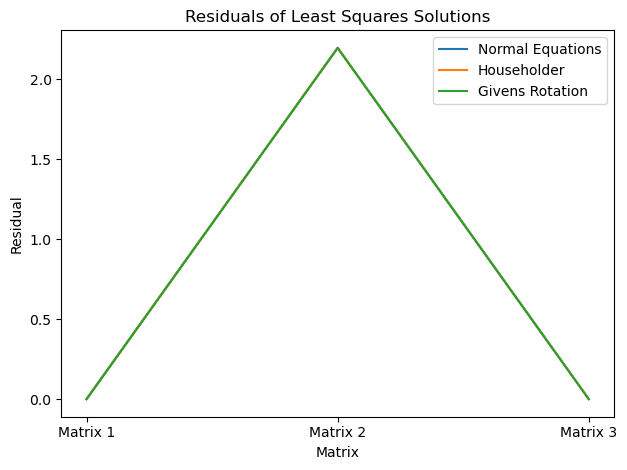

In [21]:
import matplotlib.pyplot as plt


def test2_least_squares_methods():
    matrices = [np.array([[1, 2],
                          [3, 4],
                          [5, 6]]),
                np.array([[2, -1],
                          [1, 3],
                          [-1, 2]]),
                np.array([[3, 1, 2],
                          [2, 5, 1],
                          [1, 2, 4]])]
    vectors = [np.array([7, 8, 9]),
               np.array([1, 2, 3]),
               np.array([4, 5, 6])]

    residuals_normal_eq = []
    residuals_householder = []
    residuals_givens = []

    for A, b in zip(matrices, vectors):
        # Cholesky-Zerlegung
        L = cholesky_zerlegung(np.dot(A.T, A))

        # Gaußsche Normalengleichungen
        x_normal_eq = solve_least_squares_normal_equations(A, b)

        # Transformation über Householder-Orthogonalisierung
        R_householder, b1_householder = transform_system_with_householder(A, b)
        x_householder = solve_reduced_system(R_householder, b1_householder)

        # Transformation mittels Givens-Rotation
        R_givens, b1_givens = transform_system_with_givens_rotation(A, b)
        x_givens = solve_reduced_system(R_givens, b1_givens)

        # Residuum berechnen
        residual_normal_eq = np.linalg.norm(b - np.dot(A, x_normal_eq))
        residual_householder = np.linalg.norm(b - np.dot(A, x_householder))
        residual_givens = np.linalg.norm(b - np.dot(A, x_givens))

        residuals_normal_eq.append(residual_normal_eq)
        residuals_householder.append(residual_householder)
        residuals_givens.append(residual_givens)

    # Ergebnisse und Residuen anzeigen
    fig, ax = plt.subplots()
    methods = ['Matrix 1', 'Matrix 2', 'Matrix 3']
    index = np.arange(len(methods))
    ax.plot(index, residuals_normal_eq, label='Normal Equations')
    ax.plot(index, residuals_householder, label='Householder')
    ax.plot(index, residuals_givens, label='Givens Rotation')
    ax.set_xlabel('Matrix')
    ax.set_ylabel('Residual')
    ax.set_title('Residuals of Least Squares Solutions')
    ax.set_xticks(index)
    ax.set_xticklabels(methods)
    ax.legend()
    plt.tight_layout()
    plt.show()

test2_least_squares_methods()

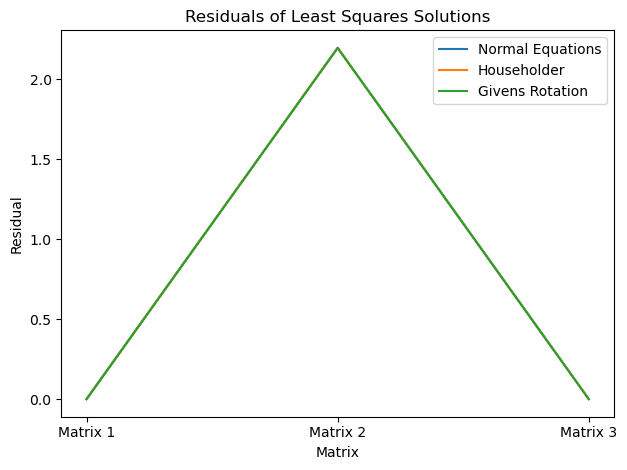

In [17]:
test2_least_squares_methods()

In [ ]:
# Test 05.07.2023

In [19]:
import numpy as np

def householder_transformation(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    H = np.eye(m)
    for k in range(n):
        u = np.copy(R[k:, k])
        u[0] = u[0] + np.sign(u[0]) * np.linalg.norm(u)
        u = u / np.linalg.norm(u)
        R[k:, k:] -= 2 * np.outer(u, np.dot(u, R[k:, k:]))
        H[k:, k:] -= 2 * np.outer(u, np.dot(u, H[k:, k:]))
        Q[k:] -= 2 * np.outer(u, np.dot(u, Q[k:]))
    return H, Q.T, R

def givens_rotation(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    H = np.eye(m)
    for k in range(n):
        for j in range(k + 1, m):
            if R[j, k] != 0:
                r = np.hypot(R[k, k], R[j, k])
                c = R[k, k] / r
                s = -R[j, k] / r
                G = np.array([[c, s], [-s, c]])
                R[[k, j], k:] = np.dot(G, R[[k, j], k:])
                H[[k, j], :] = np.dot(G, H[[k, j], :])
                Q[:, [k, j]] = np.dot(Q[:, [k, j]], G.T)
    return H, Q.T, R

def solve_reduced_system(R, b1):
    return np.linalg.solve(R, b1)

# Beispielmatrix A und Vektor b
V = np.array([[3, -9, 7],
              [-4, -13, -1],
              [0, -20, -35]], dtype='float64')
a = np.array([2, 2, 1], dtype='int32')

# a) Householder-Orthogonalisierung
H_householder, Q_householder, R_householder = householder_transformation(V)
print("Householder Transformation:")
print("H:")
print(H_householder)
print("Q:")
print(Q_householder)
print("R:")
print(R_householder)

# b) Givens-Rotation
H_givens, Q_givens, R_givens = givens_rotation(V)
print("\nGivens Rotation:")
print("H:")
print(H_givens)
print("Q:")
print(Q_givens)
print("R:")
print(R_givens)

# Reduziertes Gleichungssystem lösen
b1 = np.dot(Q_householder.T, a)[:R_householder.shape[1]]
x = solve_reduced_system(R_householder, b1)
print("\nLösung des reduzierten Gleichungssystems:")
print("x:")
print(x)

# Residuum berechnen
residual = np.linalg.norm(b - np.dot(V, x))
print("Residuum:")
print(residual)


Householder Transformation:
H:
[[-0.6   0.8   0.  ]
 [ 0.8  -0.36 -0.8 ]
 [ 0.   -0.48 -0.6 ]]
Q:
[[-0.6  -0.48  0.64]
 [ 0.8  -0.36  0.48]
 [ 0.   -0.8  -0.6 ]]
R:
[[-5. -5. -5.]
 [ 0. 25. 25.]
 [ 0.  0. 25.]]

Givens Rotation:
H:
[[ 0.6         0.8         0.        ]
 [ 0.02398921 -0.01799191  0.9995503 ]
 [ 0.79964024 -0.59973018 -0.02998651]]
Q:
[[ 0.6         0.8         0.        ]
 [ 0.02398921 -0.01799191  0.9995503 ]
 [ 0.79964024 -0.59973018 -0.02998651]]
R:
[[ -1.4        -15.8          3.4       ]
 [ -4.8        -19.97301416 -34.79834427]
 [  0.           1.19946036   7.2467397 ]]

Lösung des reduzierten Gleichungssystems:
x:
[ 0.0192 -0.1648  0.0656]
Residuum:
6.280369834735101e-16


Ergebnisse:
Matrix		Householder Residual		Givens Residual		Difference in x
1		1.9118806244376894			2.010637390419646		5.508322232143182
2		1.996373082760646			3.1716182984031116		9.326067645455225
3		1.1107481030701334			0.9922534651997112		0.136660768759168
4		1.4202043196530567			1.3652879805182243		0.25007078330540694
5		2.0877002063322094			2.0533829107523007		30.510844802080104
6		1.508713120550245			1.694466212987275		2.3419794585195275
7		1.3070830364351729			1.3513453789022223		2.9445107541524154
8		0.5109787359755117			5.631115291891469		25.835441133174484
9		0.5129787758620524			7.884255490873081		40.15075967197875
10		1.5680892336484489			2.187504756961899		8.25130594961241


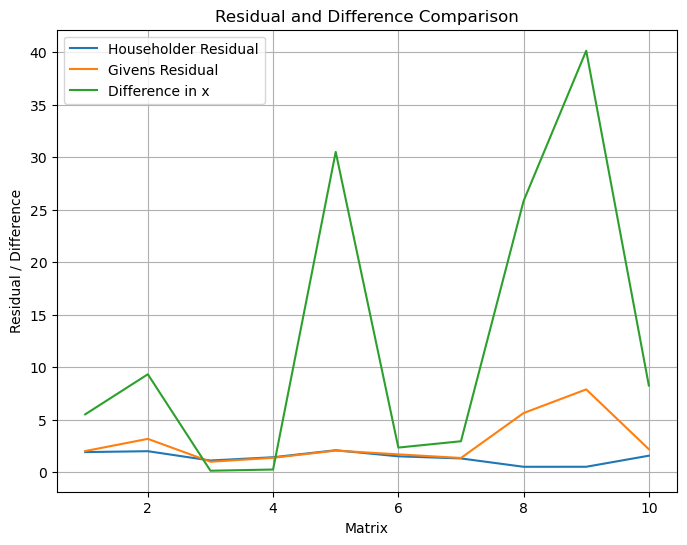

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def test_implementation():
    num_matrices = 10
    results_table = np.zeros((num_matrices, 3))

    for i in range(num_matrices):
        # Generiere zufällige Matrix A und Vektor b
        A = np.random.rand(3, 3)
        b = np.random.rand(3)

        # Householder-Orthogonalisierung
        _, _, R_householder = householder_transformation(A)
        b1_householder = np.dot(Q_householder.T, b)[:R_householder.shape[1]]
        x_householder = solve_reduced_system(R_householder, b1_householder)
        residual_householder = np.linalg.norm(b - np.dot(A, x_householder))

        # Givens-Rotation
        _, _, R_givens = givens_rotation(A)
        b1_givens = np.dot(Q_givens.T, b)[:R_givens.shape[1]]
        x_givens = solve_reduced_system(R_givens, b1_givens)
        residual_givens = np.linalg.norm(b - np.dot(A, x_givens))

        # Ergebnisse speichern
        results_table[i] = [residual_householder, residual_givens, np.linalg.norm(x_householder - x_givens)]

    # Tabelle ausgeben
    print("Ergebnisse:")
    print("Matrix\t\tHouseholder Residual\t\tGivens Residual\t\tDifference in x")
    for i, row in enumerate(results_table):
        print(f"{i+1}\t\t{row[0]}\t\t\t{row[1]}\t\t{row[2]}")

    # Diagramm erstellen
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_matrices + 1), results_table[:, 0], label="Householder Residual")
    plt.plot(range(1, num_matrices + 1), results_table[:, 1], label="Givens Residual")
    plt.plot(range(1, num_matrices + 1), results_table[:, 2], label="Difference in x")
    plt.xlabel("Matrix")
    plt.ylabel("Residual / Difference")
    plt.title("Residual and Difference Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# Testen der Implementierung
test_implementation()
